In [1]:
!pipenv install pyspark

Installing pyspark...

Installing dependencies from Pipfile.lock (3a1865)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.



[    ] Installing..
[=   ] Installing pyspark..
[==  ] Installing pyspark..
[=== ] Installing pyspark..
[ ===] Installing pyspark..
[  ==] Installing pyspark..
[   =] Installing pyspark..
[    ] Installing pyspark..
[   =] Installing pyspark..
[  ==] Installing pyspark..
[ ===] Installing pyspark..
[====] Installing pyspark..
[=== ] Installing pyspark..
[==  ] Installing pyspark..
[=   ] Installing pyspark..
[    ] Installing pyspark..
[=   ] Installing pyspark..
[==  ] Installing pyspark..
[=== ] Installing pyspark..
[ ===] Installing pyspark..
[  ==] Installing pyspark..
[   =] Installing pyspark..
[    ] Installing pyspark..
[   =] Installing pyspark..
[  ==] Installing pyspark..
[ ===] Installing pyspark..
[====] Installing pyspark..
[=== ] Installing pyspark...
Adding pyspark to Pipfile's [packages]...
Installation Succeeded 
  ================================ 0/0 - 00:00:00



In [2]:
import pyspark
import pandas as pd
import pyspark.sql
import matplotlib.pyplot as plt
import seaborn as sns
import time
import findspark
from pyspark.ml.feature import Tokenizer, RegexTokenizer,IDF
from pyspark.ml.feature import StopWordsRemover
from pyspark.sql.functions import col, udf
from pyspark.sql.types import IntegerType
%matplotlib inline
from pyspark.ml.feature import CountVectorizer
from pyspark import SparkContext

In [3]:
findspark.init(r"C:\Users\rejee\spark-3.3.1-bin-hadoop3")

In [4]:
sc = SparkContext(master="local[1]")

In [5]:
from pyspark.sql import SparkSession

In [6]:
spark=SparkSession.builder.appName("Amazone").getOrCreate()

In [7]:
df = spark.read.load(".\kindle_reviews.csv", format="csv", sep=",", header="true", inferSchema=True)

In [8]:
df.show()

+---+----------+-------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|_c0|      asin|helpful|overall|          reviewText|          reviewTime|          reviewerID|        reviewerName|             summary|      unixReviewTime|
+---+----------+-------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  0|B000F83SZQ| [0, 0]|      5|I enjoy vintage b...|          05 5, 2014|      A1F6404F1VG29J|          Avidreader|  Nice vintage story|          1399248000|
|  1|B000F83SZQ| [2, 2]|      4|This book is a re...|          01 6, 2014|       AN0N05A9LIJEQ|            critters|        Different...|          1388966400|
|  2|B000F83SZQ| [2, 2]|      4|This was a fairly...|          04 4, 2014|       A795DMNCJILA6|                 dot|               Oldie|          1396569600|
|  3|B000F83SZQ| [1, 1]|      5|I'd never read

In [9]:
df1=df.groupBy('overall').count().show()

+-------+------+
|overall| count|
+-------+------+
|   null|   201|
|      1| 23018|
|      3| 96194|
|      5|575264|
|      4|254013|
|      2| 34130|
+-------+------+



In [12]:
from matplotlib import pyplot as plt
import seaborn as sns


In [21]:
kindledf = df.groupBy('overall').count()
kindledf

DataFrame[overall: int, count: bigint]

In [22]:
kindledf_overall.show()

NameError: name 'kindledf_overall' is not defined

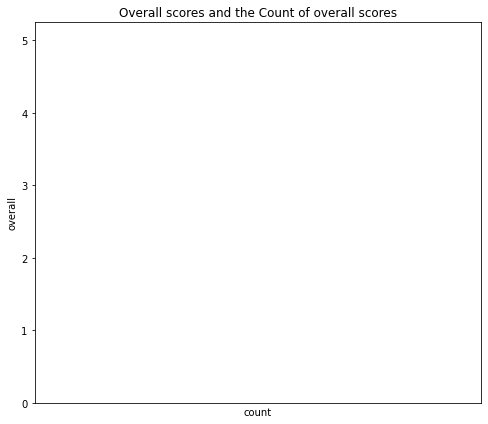

In [17]:
dafr = df.toPandas()
plt.figure(figsize=(8,7))
sns.barplot(x='count', y='overall', data=dafr)
plt.title("Overall scores and the Count of overall scores")
plt.xlim(10000,600000)
plt.show()

ValueError: 'explode' must be of length 'x'

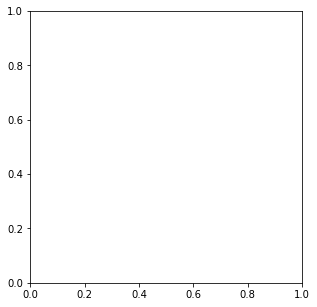

In [18]:
import pandas as pd
overall_data = dafr["overall"]
count_data = dafr["count"]
fig=plt.figure(figsize=(5,5))
fig.patch.set_facecolor('w')
explode = (0.1,0,0,0,0)
#Plot
plt.pie(count_data,autopct='%1.1f%%',startangle=90,explode=explode)
plt.title('Overall scores and their counts',bbox={'facecolor':'0.8','pad':4})
plt.legend(overall_data,loc="lower left")